In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    r2_score, mean_squared_error
)

import joblib
import os


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [63]:
df = pd.read_csv("winequality-red.csv")
df.head()
wine_dataset = df.copy()

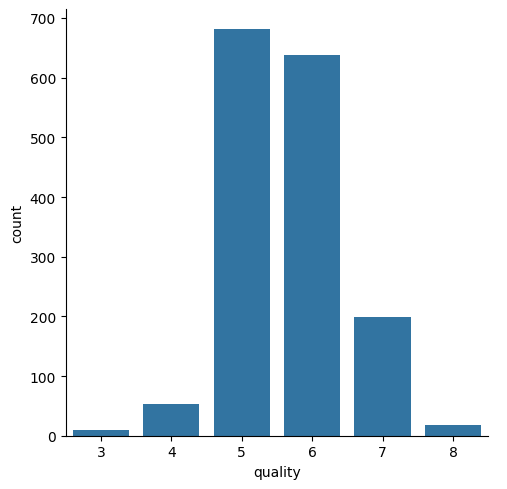

In [64]:
df['quality'].value_counts()
sns.catplot(x='quality', data = df, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

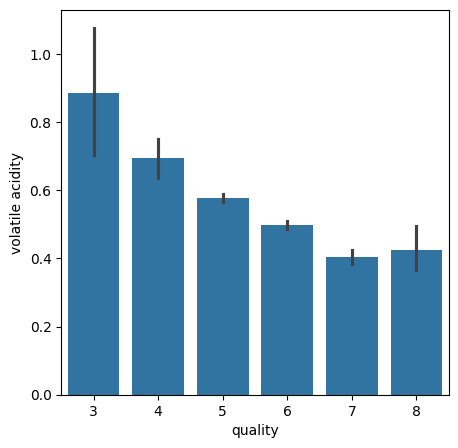

In [65]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

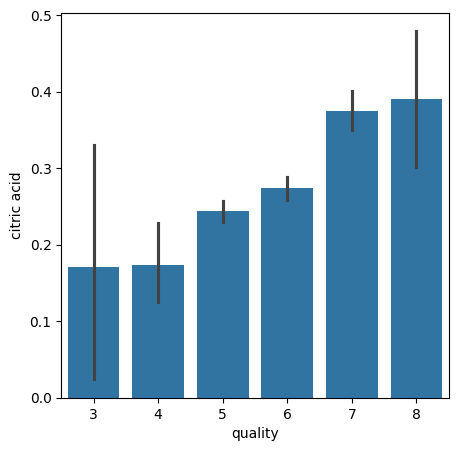

In [66]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

<Axes: >

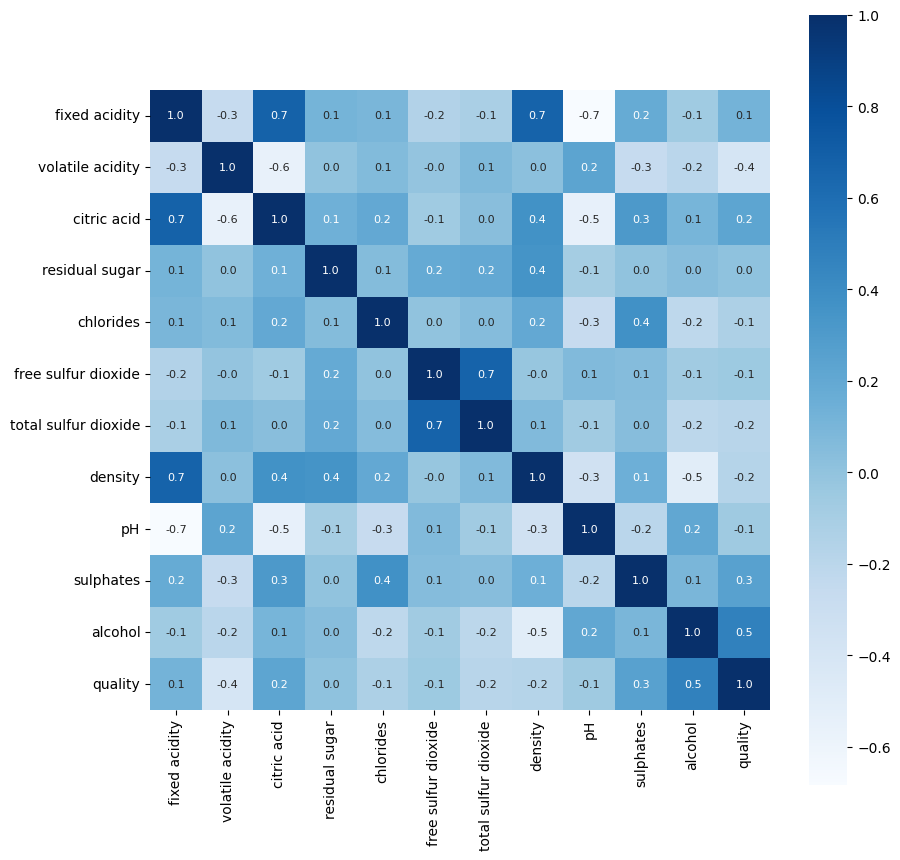

In [67]:
correlation = wine_dataset.corr()
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

Data Preprocessing

In [68]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [69]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [70]:
# treain @ test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [71]:
models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machine': SVC(),
        'Naive Bayes': GaussianNB(),
        'Gradient Boosting': GradientBoostingClassifier()
    }

In [72]:
save_path = "saved_models"
os.makedirs(save_path, exist_ok=True)
problem_type = "classification"
# Save the model


🚀 Training, Evaluating, and Saving: Logistic Regression
💾 Model saved at: saved_models\logistic_regression.pkl


c:\Users\athun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\athun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://sciki

📚 Cross-Validation Mean Score: 0.8693
✅ Accuracy: 0.8656
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.62      0.21      0.32        47

    accuracy                           0.87       320
   macro avg       0.75      0.60      0.62       320
weighted avg       0.84      0.87      0.84       320



c:\Users\athun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


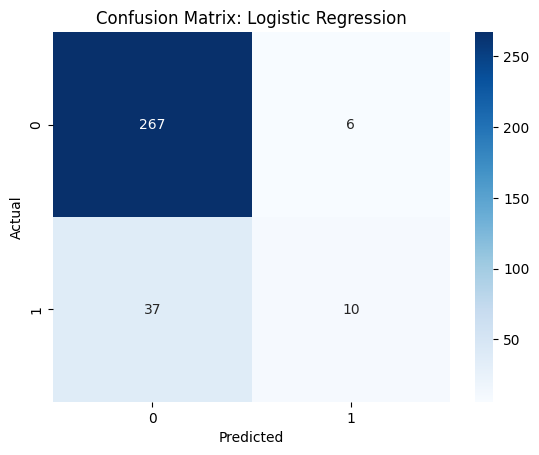

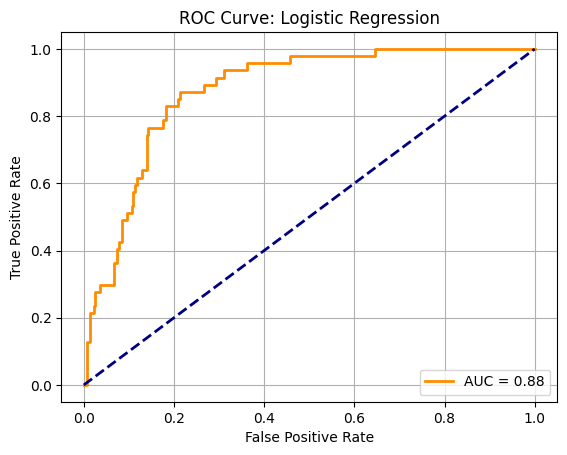


🚀 Training, Evaluating, and Saving: Decision Tree
💾 Model saved at: saved_models\decision_tree.pkl
📚 Cross-Validation Mean Score: 0.8049
✅ Accuracy: 0.8750
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       273
           1       0.58      0.53      0.56        47

    accuracy                           0.88       320
   macro avg       0.75      0.73      0.74       320
weighted avg       0.87      0.88      0.87       320



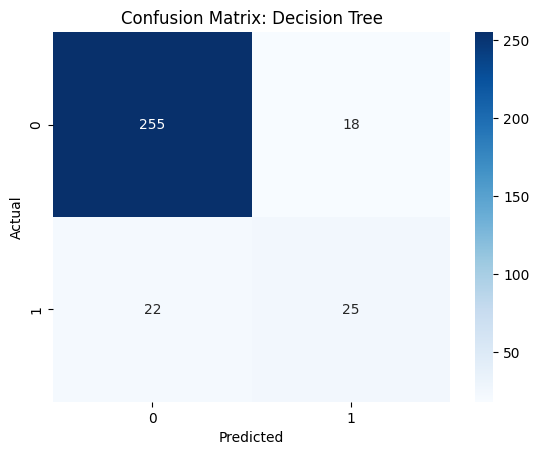

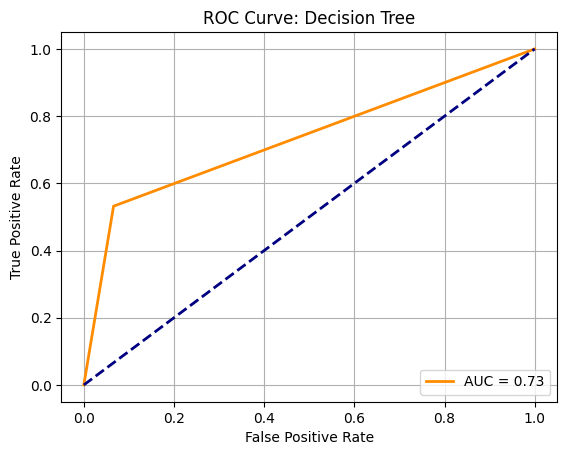


🚀 Training, Evaluating, and Saving: Random Forest
💾 Model saved at: saved_models\random_forest.pkl
📚 Cross-Validation Mean Score: 0.8693
✅ Accuracy: 0.8969
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.69      0.53      0.60        47

    accuracy                           0.90       320
   macro avg       0.81      0.75      0.77       320
weighted avg       0.89      0.90      0.89       320



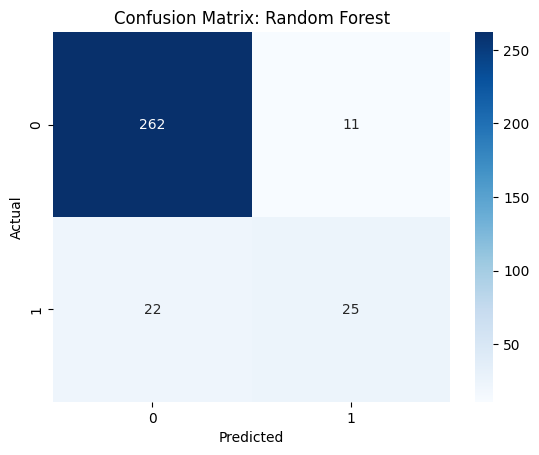

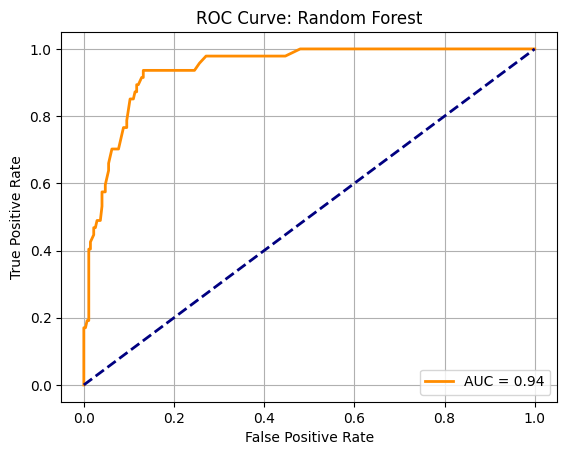


🚀 Training, Evaluating, and Saving: K-Nearest Neighbors
💾 Model saved at: saved_models\k-nearest_neighbors.pkl
📚 Cross-Validation Mean Score: 0.8449
✅ Accuracy: 0.8562
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.53      0.21      0.30        47

    accuracy                           0.86       320
   macro avg       0.70      0.59      0.61       320
weighted avg       0.83      0.86      0.83       320



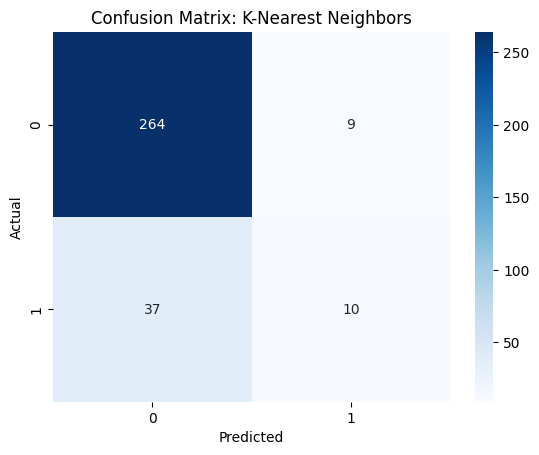

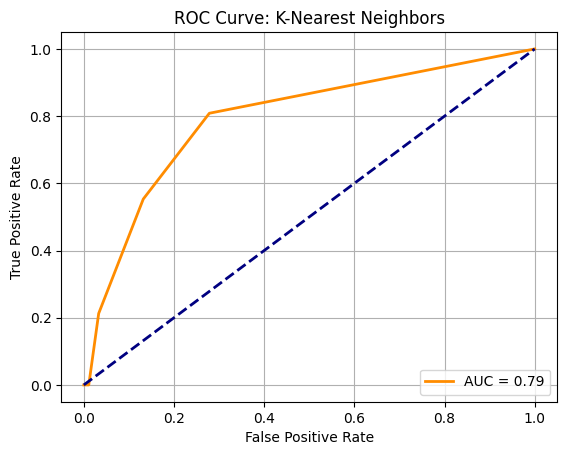


🚀 Training, Evaluating, and Saving: Support Vector Machine
💾 Model saved at: saved_models\support_vector_machine.pkl
📚 Cross-Validation Mean Score: 0.8643
✅ Accuracy: 0.8562
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320



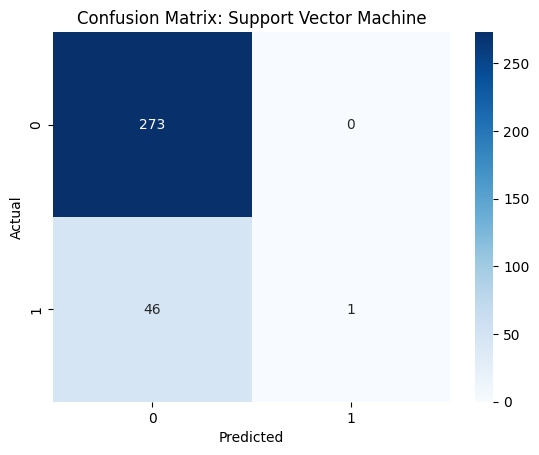

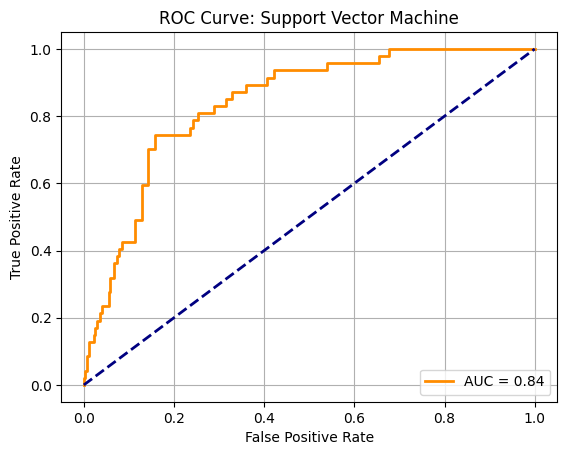


🚀 Training, Evaluating, and Saving: Naive Bayes
💾 Model saved at: saved_models\naive_bayes.pkl
📚 Cross-Validation Mean Score: 0.8068
✅ Accuracy: 0.8531
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       273
           1       0.50      0.79      0.61        47

    accuracy                           0.85       320
   macro avg       0.73      0.83      0.76       320
weighted avg       0.89      0.85      0.87       320



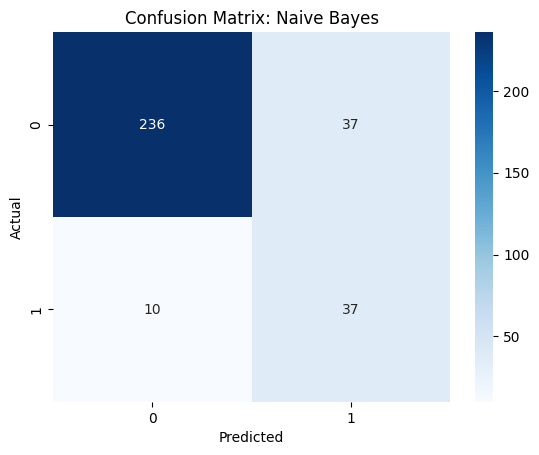

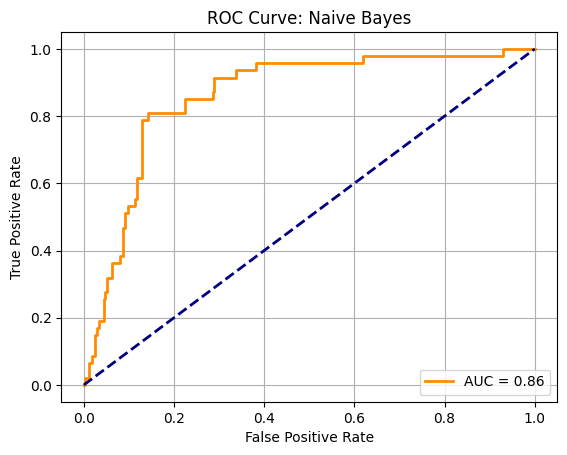


🚀 Training, Evaluating, and Saving: Gradient Boosting
💾 Model saved at: saved_models\gradient_boosting.pkl
📚 Cross-Validation Mean Score: 0.8662
✅ Accuracy: 0.8719
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       273
           1       0.59      0.40      0.48        47

    accuracy                           0.87       320
   macro avg       0.75      0.68      0.70       320
weighted avg       0.86      0.87      0.86       320



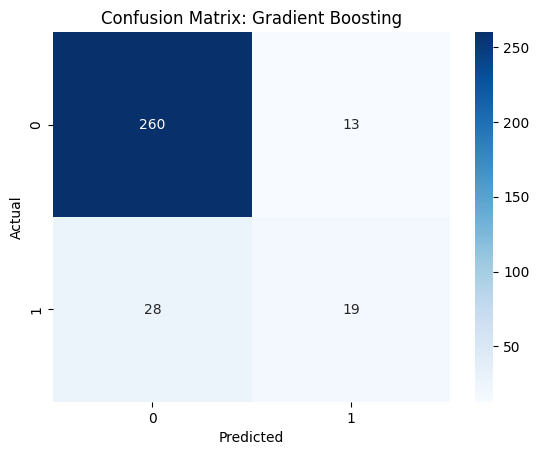

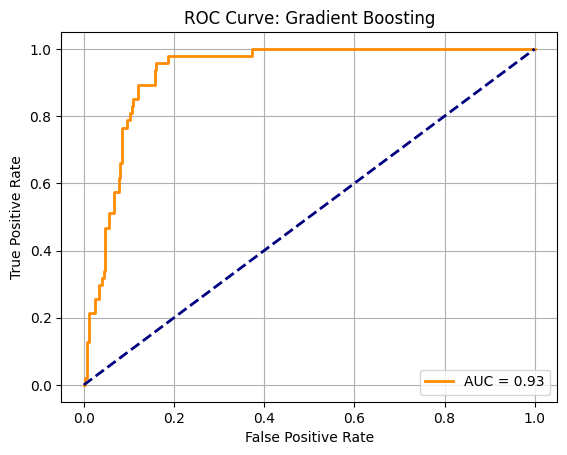

In [73]:
results = []

for name, model in models.items():
    print(f"\n🚀 Training, Evaluating, and Saving: {name}")
    
    # Train model
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    # Save the model
    filename = os.path.join(save_path, name.replace(" ", "_").lower() + ".pkl")
    joblib.dump(model, filename)
    print(f"💾 Model saved at: {filename}")
    
    # Cross-Validation (5-fold)
    cv_scores = cross_val_score(model, X, Y, cv=5)
    mean_cv = np.mean(cv_scores)
    print(f"📚 Cross-Validation Mean Score: {mean_cv:.4f}")
    
    if problem_type == 'classification':
        acc = accuracy_score(Y_test, y_pred)
        print(f"✅ Accuracy: {acc:.4f}")
        print("📊 Classification Report:\n", classification_report(Y_test, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(Y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix: {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        
        # ROC Curve (only for binary classification)
        if len(np.unique(Y)) == 2:
            y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
            fpr, tpr, _ = roc_curve(Y_test, y_prob)
            roc_auc = auc(fpr, tpr)

            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve: {name}')
            plt.legend(loc="lower right")
            plt.grid(True)
            plt.show()
        
        results.append({'Model': name, 'Accuracy': acc, 'Cross-Val Score': mean_cv})
    

In [74]:
results_df = pd.DataFrame(results)
print("\n📈 Final Model Comparison Table:")
display(results_df)



📈 Final Model Comparison Table:


,Model,Accuracy,Cross-Val Score
0,Logistic Regression,0.865625,0.869295
1,Decision Tree,0.875000,0.804875
2,Random Forest,0.896875,0.869297
3,K-Nearest Neighbors,0.856250,0.844924
4,Support Vector Machine,0.856250,0.864291
5,Naive Bayes,0.853125,0.806793
6,Gradient Boosting,0.871875,0.866172


In [75]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)


Accuracy :  0.896875
